<a href="https://colab.research.google.com/github/NimraAkmal/DIP-Project/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!nvidia-smi
!lscpu

Thu Jun 16 19:52:11 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   66C    P0    31W /  70W |   8984MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install tensorflow==2.8
!pip install git+https://github.com/karolzak/ipyplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/karolzak/ipyplot to /tmp/pip-req-build-rwj6wejh
  Running command git clone -q https://github.com/karolzak/ipyplot /tmp/pip-req-build-rwj6wejh


In [ ]:
import tensorflow as tf
import numpy as np
import cv2
from matplotlib import pyplot as plt
import pandas as pd
import os
import random
import ipyplot
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import math
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.losses import *


In [ ]:
def decaying_cosine_annealing_scheduler(epoch):
    """
        A step rate scheduler for setting the learning rate for each epoch.
        :param epoch: current epoch
        :return: learning rate for current epoch
        """
    learning_rate_min = 1e-6
    original_learning_rate_max = 1e-3
    original_cycle_length = 15
    epochs_per_cycle = original_cycle_length-(int(epoch/original_cycle_length))
    learning_rate_max = original_learning_rate_max/((int(epoch/original_cycle_length))+1)
    #print(learning_rate_max,learning_rate_min, epoch, epochs_per_cycle)

    return learning_rate_min + (learning_rate_max - learning_rate_min) * \
           (1 + math.cos(math.pi * (epoch % epochs_per_cycle) / epochs_per_cycle)) / 2

In [ ]:

my_list = os.listdir('/content/drive/MyDrive/Classification/Training')
print(my_list)

categorical = pd.DataFrame(my_list)
print('Before One Hot Encoding:')
display(categorical)

one_hot_encoder = OneHotEncoder(sparse=False)
one_hot_encoder.fit(categorical)

encoded = one_hot_encoder.transform(categorical)
encoded = pd.DataFrame(data=encoded, columns=one_hot_encoder.categories_)
print('\nAfter One Hot Encoding:')
display(encoded)

#converting the pandas dataframe to simple array using numpy
array=[]
array=encoded.to_numpy()
display(array)


['2. CARDIOMEGALY', '1. ATELECTASIS', '10. PLEURAL EFFUSION', '3. CONSOLIDATION', '4. EDEMA', '9. NO FINDING']
Before One Hot Encoding:


0
0       2. CARDIOMEGALY
1        1. ATELECTASIS
2  10. PLEURAL EFFUSION
3      3. CONSOLIDATION
4              4. EDEMA
5         9. NO FINDING


After One Hot Encoding:


1. ATELECTASIS 10. PLEURAL EFFUSION 2. CARDIOMEGALY 3. CONSOLIDATION  \
0            0.0                  0.0             1.0              0.0   
1            1.0                  0.0             0.0              0.0   
2            0.0                  1.0             0.0              0.0   
3            0.0                  0.0             0.0              1.0   
4            0.0                  0.0             0.0              0.0   
5            0.0                  0.0             0.0              0.0   

  4. EDEMA 9. NO FINDING  
0      0.0           0.0  
1      0.0           0.0  
2      0.0           0.0  
3      0.0           0.0  
4      1.0           0.0  
5      0.0           1.0

array([[0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.]])

In [ ]:
#label numpy array
labels=[]
from os import listdir

#images as numpy array
img_array=[]

cardio=os.listdir('/content/drive/MyDrive/Classification/Training/2. CARDIOMEGALY')
a=len(cardio)
for i in range(a):
  labels.append(array[0])
  img = cv2.imread(os.path.join('/content/drive/MyDrive/Classification/Training/2. CARDIOMEGALY', cardio[i]))
  img = cv2.resize(img, (512,512), interpolation = cv2.INTER_AREA)
  kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
  image_sharp = cv2.filter2D(src=img, ddepth=-1, kernel=kernel)
  img_array.append (image_sharp)

atelect=os.listdir('/content/drive/MyDrive/Classification/Training/1. ATELECTASIS')
a=len(atelect)
for i in range(a):
  labels.append(array[1])
  img = cv2.imread(os.path.join('/content/drive/MyDrive/Classification/Training/1. ATELECTASIS',atelect[i]))
  img = cv2.resize(img, (512,512), interpolation = cv2.INTER_AREA)
  kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
  image_sharp = cv2.filter2D(src=img, ddepth=-1, kernel=kernel)
  img_array.append (image_sharp)

pleural=os.listdir('/content/drive/MyDrive/Classification/Training/10. PLEURAL EFFUSION')
a=len(pleural)
for i in range(a):
  labels.append(array[2])
  img = cv2.imread(os.path.join('/content/drive/MyDrive/Classification/Training/10. PLEURAL EFFUSION',pleural[i]))
  img = cv2.resize(img, (512,512), interpolation = cv2.INTER_AREA)
  kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
  image_sharp = cv2.filter2D(src=img, ddepth=-1, kernel=kernel)
  img_array.append (image_sharp)

consolidation=os.listdir('/content/drive/MyDrive/Classification/Training/3. CONSOLIDATION')
a=len(consolidation)
for i in range(a):
  labels.append(array[3])
  img = cv2.imread(os.path.join('/content/drive/MyDrive/Classification/Training/3. CONSOLIDATION',consolidation[i]))
  img = cv2.resize(img, (512,512), interpolation = cv2.INTER_AREA)
  kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
  image_sharp = cv2.filter2D(src=img, ddepth=-1, kernel=kernel)
  img_array.append (image_sharp)

edema=os.listdir('/content/drive/MyDrive/Classification/Training/4. EDEMA')
a=len(edema)
for i in range(a):
  labels.append(array[4])
  img = cv2.imread(os.path.join('/content/drive/MyDrive/Classification/Training/4. EDEMA',edema[i]))
  img = cv2.resize(img, (512,512), interpolation = cv2.INTER_AREA)
  kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
  image_sharp = cv2.filter2D(src=img, ddepth=-1, kernel=kernel)
  img_array.append (image_sharp)

no_finding=os.listdir('/content/drive/MyDrive/Classification/Training/9. NO FINDING')
a=len(no_finding)
for i in range(a):
  labels.append(array[5])
  img = cv2.imread(os.path.join('/content/drive/MyDrive/Classification/Training/9. NO FINDING',no_finding[i]))
  img = cv2.resize(img, (512,512), interpolation = cv2.INTER_AREA)
  kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
  image_sharp = cv2.filter2D(src=img, ddepth=-1, kernel=kernel)
  img_array.append (image_sharp)

labels = np.array(labels)
img_array=np.array(img_array)


In [ ]:
import numpy as np
from PIL import Image
import os, sys
import cv2
import numpy as np

training_labels=np.save('training_labels.npy', labels)
training_images=np.save('training_images.npy', img_array)

training=np.load('training_labels.npy')
training_img=np.load('training_images.npy', allow_pickle=True)
print('Shape of training images and training lables is: ', training_img.shape, ',', training.shape)

Shape of training images and training lables is:  (1503, 512, 512, 3) , (1503, 6)



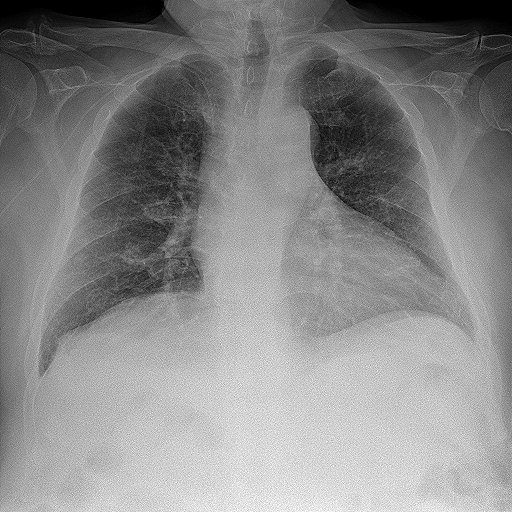
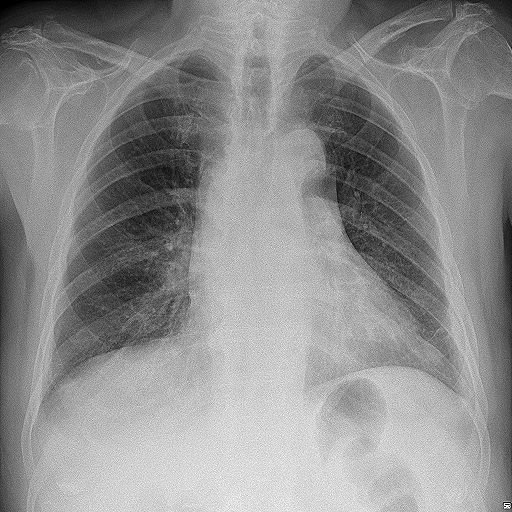
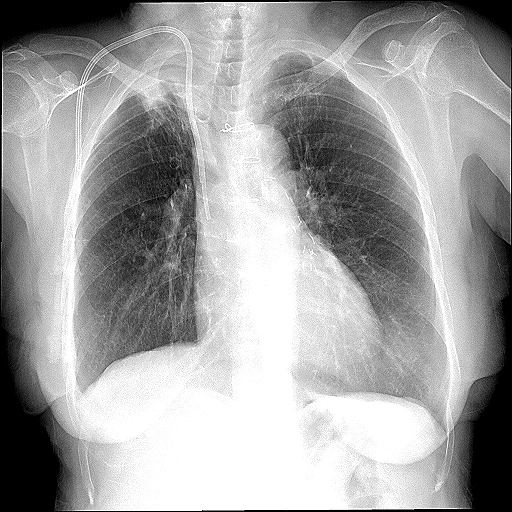
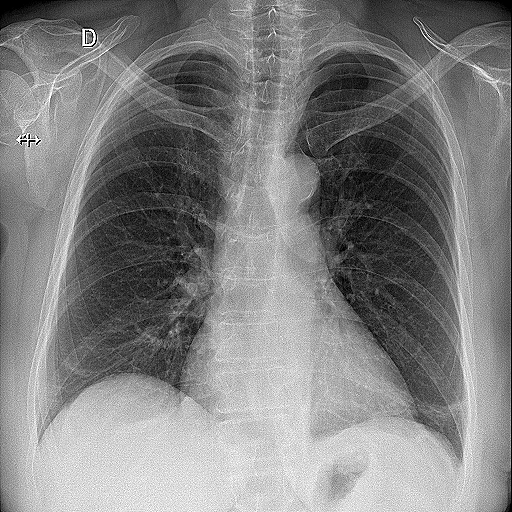
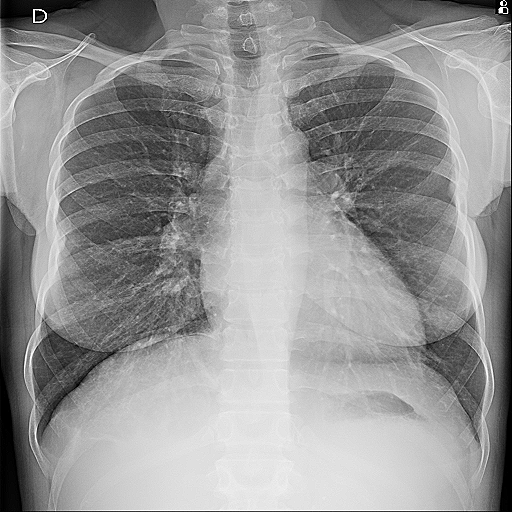
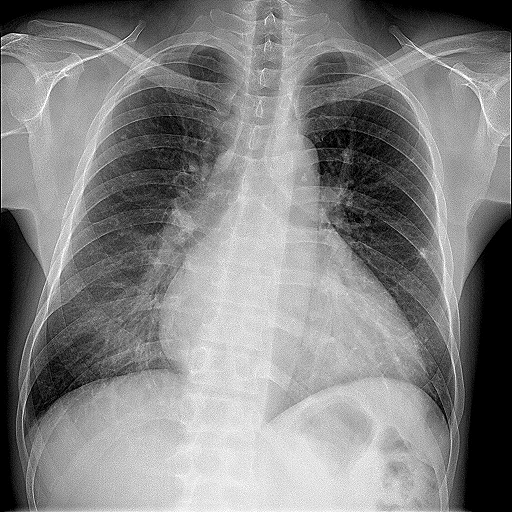
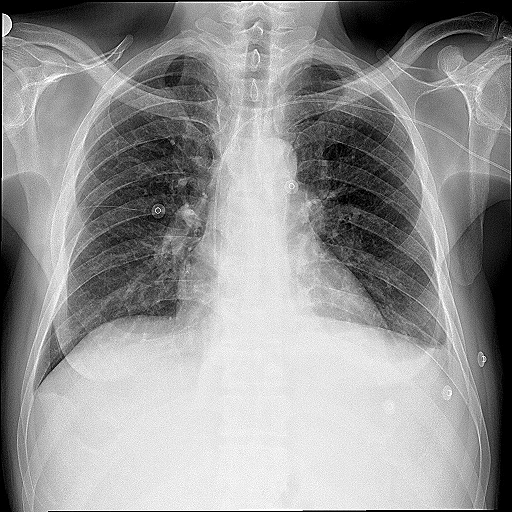
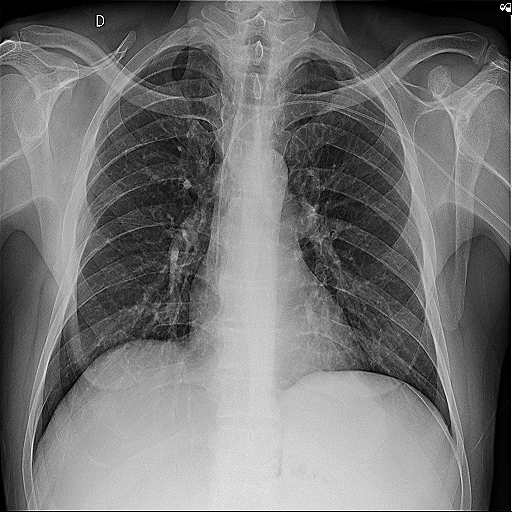
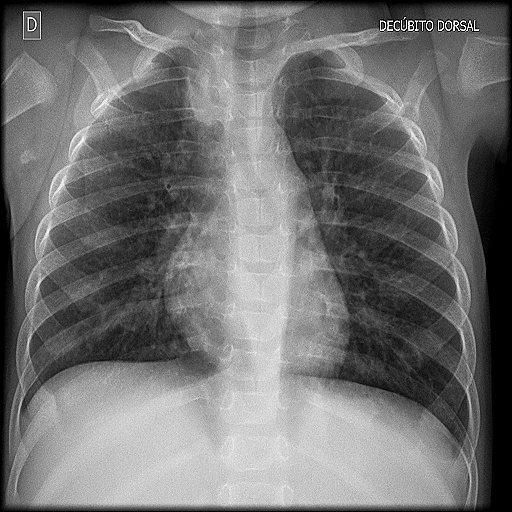
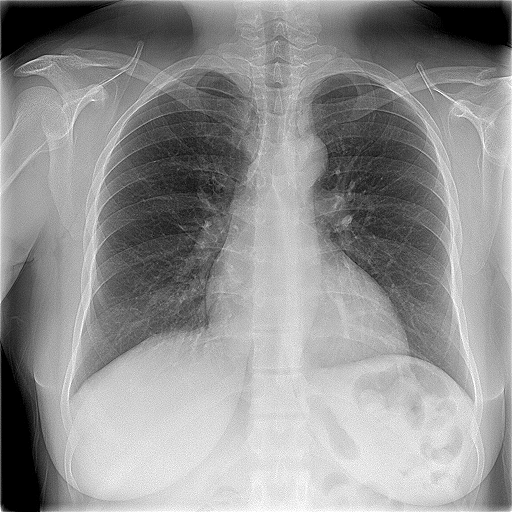


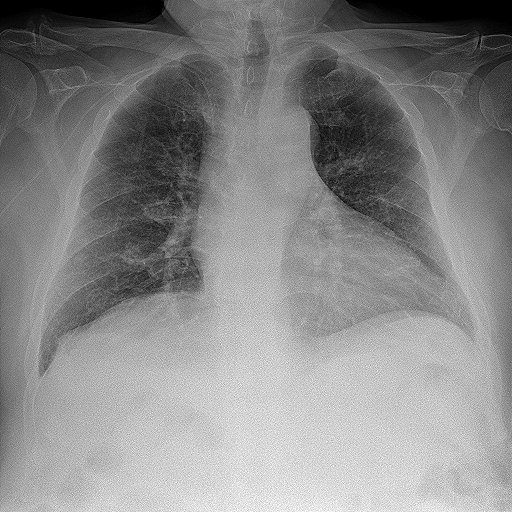
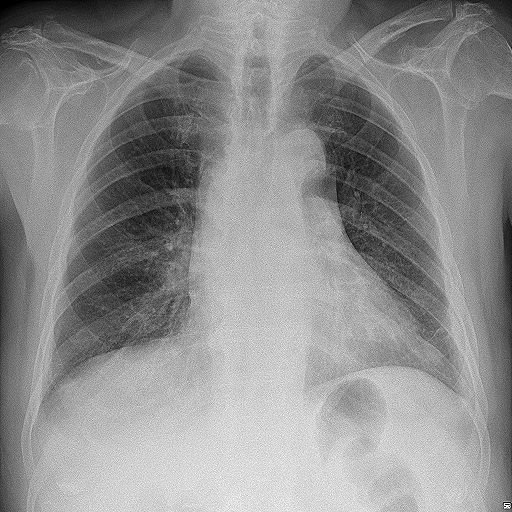
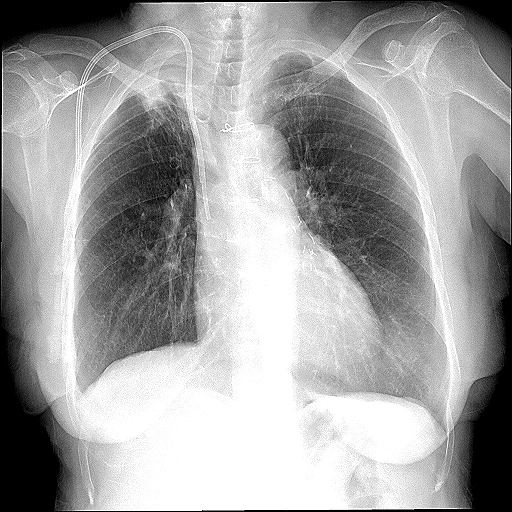
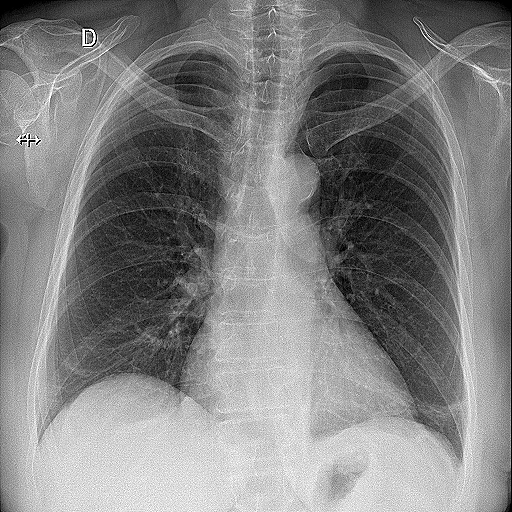
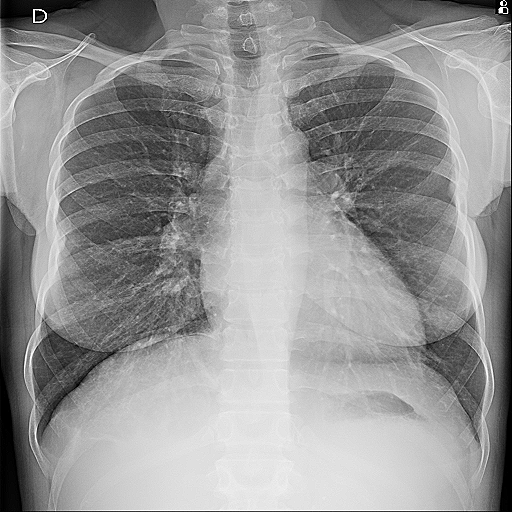
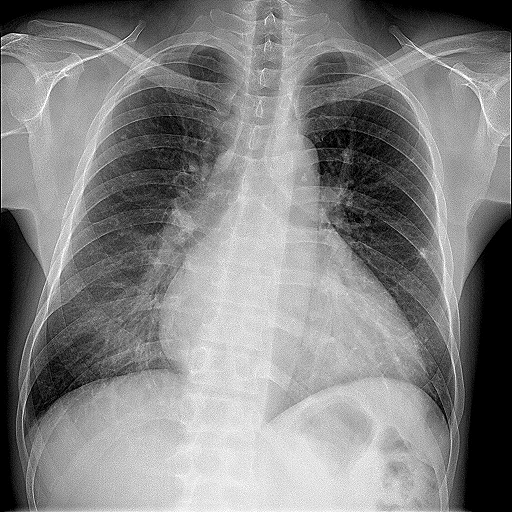
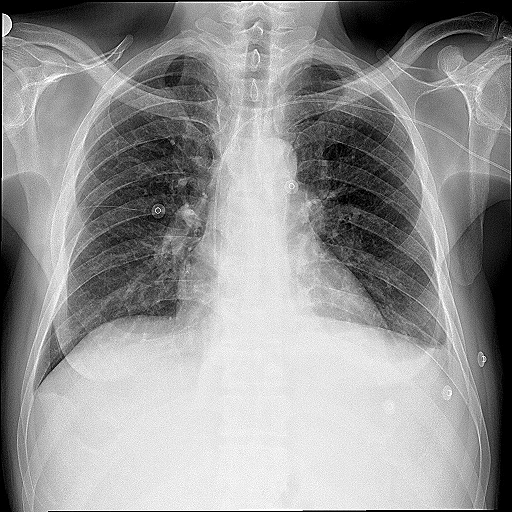
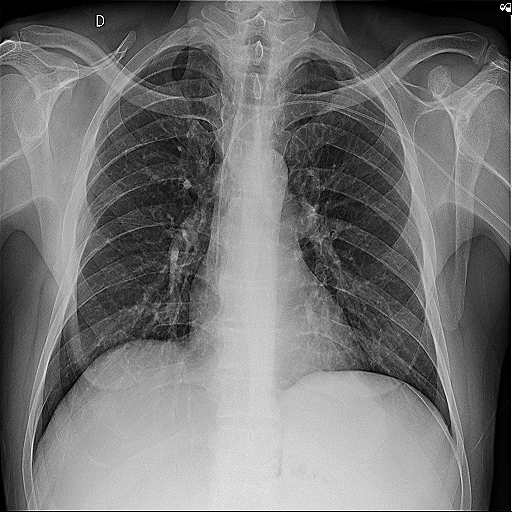
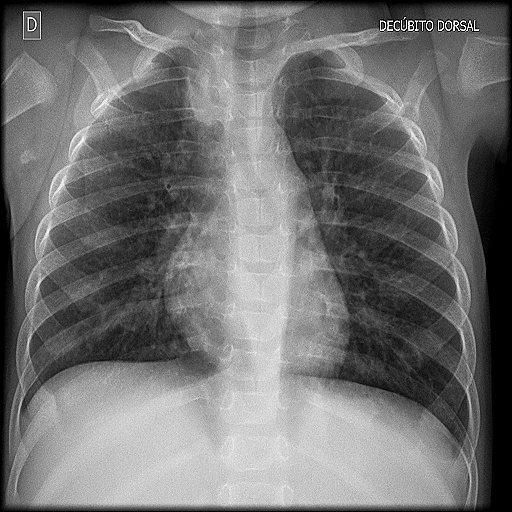
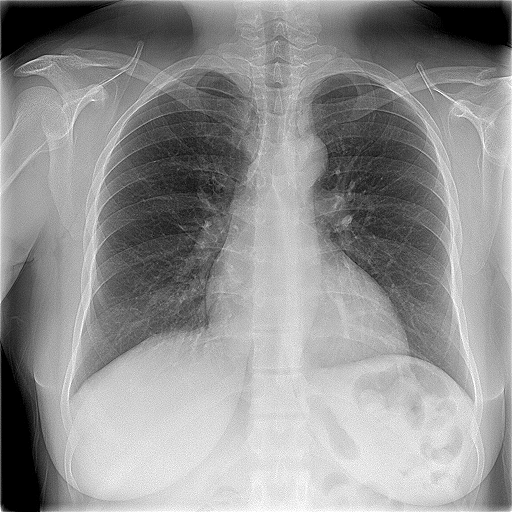

[[0.0, 0.0, 1.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0, 0.0, 0.0]]


In [ ]:
ipyplot.plot_images(training_img[:,:,:,::-1], max_images=10, img_width=150)
print([list(x) for x in training[0:10,:]], sep = '     ')

In [ ]:
#testlabel as array
test_labels=[]
from os import listdir
#test images as array
test_array=[]

cardio_test=os.listdir('/content/drive/MyDrive/Classification/Validation/2. CARDIOMEGALY')
a=len(cardio_test)
for i in range(a):
  test_labels.append(array[0])
  img = cv2.imread(os.path.join('/content/drive/MyDrive/Classification/Validation/2. CARDIOMEGALY', cardio_test[i]))
  img = cv2.resize(img, (512,512), interpolation = cv2.INTER_AREA)
  kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
  image_sharp = cv2.filter2D(src=img, ddepth=-1, kernel=kernel)
  test_array.append (image_sharp)

atelect_test=os.listdir('/content/drive/MyDrive/Classification/Validation/1. ATELECTASIS')
a=len(atelect_test)
for i in range(a):
  test_labels.append(array[1])
  img = cv2.imread(os.path.join('/content/drive/MyDrive/Classification/Validation/1. ATELECTASIS',atelect_test[i]))
  img = cv2.resize(img, (512,512), interpolation = cv2.INTER_AREA)
  kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
  image_sharp = cv2.filter2D(src=img, ddepth=-1, kernel=kernel)
  test_array.append (image_sharp)

pleural_test=os.listdir('/content/drive/MyDrive/Classification/Validation/10. PLEURAL EFFUSION')
a=len(pleural_test)
for i in range(a):
  test_labels.append(array[2])
  img = cv2.imread(os.path.join('/content/drive/MyDrive/Classification/Validation/10. PLEURAL EFFUSION',pleural_test[i]))
  img = cv2.resize(img, (512,512), interpolation = cv2.INTER_AREA)
  kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
  image_sharp = cv2.filter2D(src=img, ddepth=-1, kernel=kernel)
  test_array.append (image_sharp)


consol_test=os.listdir('/content/drive/MyDrive/Classification/Validation/3. CONSOLIDATION')
a=len(consol_test)
for i in range(a):
  test_labels.append(array[3])
  img = cv2.imread(os.path.join('/content/drive/MyDrive/Classification/Validation/3. CONSOLIDATION',consol_test[i]))
  img = cv2.resize(img, (512,512), interpolation = cv2.INTER_AREA)
  kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
  image_sharp = cv2.filter2D(src=img, ddepth=-1, kernel=kernel)
  test_array.append (image_sharp)


edema_test=os.listdir('/content/drive/MyDrive/Classification/Validation/4. EDEMA')
a=len(edema_test)
for i in range(a):
  test_labels.append(array[4])
  img = cv2.imread(os.path.join('/content/drive/MyDrive/Classification/Validation/4. EDEMA',edema_test[i]))
  img = cv2.resize(img, (512,512), interpolation = cv2.INTER_AREA)
  kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
  image_sharp = cv2.filter2D(src=img, ddepth=-1, kernel=kernel)
  test_array.append (image_sharp)


no_find_test=os.listdir('/content/drive/MyDrive/Classification/Validation/9. NO FINDING')
a=len(no_find_test)
for i in range(a):
  test_labels.append(array[5])
  img = cv2.imread(os.path.join('/content/drive/MyDrive/Classification/Validation/9. NO FINDING',no_find_test[i]))
  img = cv2.resize(img, (512,512), interpolation = cv2.INTER_AREA)
  kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
  image_sharp = cv2.filter2D(src=img, ddepth=-1, kernel=kernel)
  test_array.append (image_sharp)


test_labels = np.array(test_labels)
test_array=np.array(test_array)
display(test_labels)

test_lab=np.save('test_lab.npy', test_labels)
test_img=np.save('test_img.npy', test_array)

testing_labels=np.load('test_lab.npy')
testing_images=np.load('test_img.npy', allow_pickle=True)
print('Shape of testing images and testing lables is: ', testing_images.shape, ',', testing_labels.shape)

array([[0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]])

Shape of testing images and testing lables is:  (500, 512, 512, 3) , (500, 6)


In [ ]:
#Creating the model
inputs = Input((512,512,3))
conv1 = Conv2D(8, 3, activation='relu', padding='same')(inputs)
conv1 = BatchNormalization()(conv1)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)


conv2 = Conv2D(16, 3, activation='relu', padding='same')(pool1)
conv2 = BatchNormalization()(conv2)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)


conv3 = Conv2D(32, 3, activation='relu', padding='same')(pool2)
conv3 = BatchNormalization()(conv3)
pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)


conv4 = Conv2D(64, 3, activation='relu', padding='same')(pool3)
conv4 = BatchNormalization()(conv4)
pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

conv5 = Conv2D(128, 3, activation='relu', padding='same')(pool4)
conv5 = BatchNormalization()(conv5)
drop5 = Dropout(0.25)(conv5)

x = GlobalAveragePooling2D()(drop5)

x = Dense(64, activation='relu', name='Dense_1', dtype='float32')(x)
x = Dense(32, activation='relu', name='Dense_2', dtype='float32')(x)
x = Dense(16, activation='relu', name='Dense_3', dtype='float32')(x)
x = Dense(6, activation='softmax', name='Output', dtype='float32')(x)


my_model = Model(inputs=[inputs], outputs=[x])


my_optimiser = Adam(learning_rate=0.00001)
my_model.compile(loss='categorical_crossentropy', optimizer=my_optimiser, metrics=['categorical_accuracy'])

print('Model compiled successfully...')

my_model.summary()

Model compiled successfully...
Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 512, 512, 3)]     0         
                                                                 
 conv2d_67 (Conv2D)          (None, 512, 512, 8)       224       
                                                                 
 batch_normalization_67 (Bat  (None, 512, 512, 8)      32        
 chNormalization)                                                
                                                                 
 max_pooling2d_55 (MaxPoolin  (None, 256, 256, 8)      0         
 g2D)                                                            
                                                                 
 conv2d_68 (Conv2D)          (None, 256, 256, 16)      1168      
                                                                 
 batch_normalization_68 (Ba

In [ ]:
major_revision, minor_revision = 1,1
model_save_path = '/content/drive/MyDrive/Logs_Models/Models'
log_save_path = '/content/drive/MyDrive/Logs_Models/Logs'

file_path = os.path.join(model_save_path, 'm%i-%i.h5' % (major_revision, minor_revision))
checkpoints_callback = tf.keras.callbacks.ModelCheckpoint(file_path, monitor= 'val_categorical_accuracy', verbose = 1, mode='max', save_best_only=True, save_freq='epoch')
    
learning_rate_callback = tf.keras.callbacks.LearningRateScheduler(decaying_cosine_annealing_scheduler, verbose=True)
    
file = open(os.path.join(log_save_path, 'log-%i-%i.txt' % (major_revision, minor_revision)),'a+')
    
text_logging_callback = tf.keras.callbacks.LambdaCallback(
on_epoch_end=lambda epoch, logs: file.write('####EPOCH %i\n' % (epoch + 1) + '#### VALIDATION ACCURACY =%.5f \n' % logs['val_categorical_accuracy'])
)
    
my_callbacks = [checkpoints_callback, learning_rate_callback, text_logging_callback]

In [ ]:
epochs = 50

print('Training...')

my_model_history = my_model.fit(x=training_img, y=training, epochs=epochs,  callbacks=my_callbacks, validation_split = 0.1)


file.close()

Training...

Epoch 1: LearningRateScheduler setting learning rate to 0.001.
Epoch 1/50
43/43 [==============================] - ETA: 0s - loss: 1.7164 - categorical_accuracy: 0.2544
Epoch 1: val_categorical_accuracy improved from -inf to 1.00000, saving model to /content/drive/MyDrive/Logs_Models/Models/m1-1.h5
43/43 [==============================] - 9s 183ms/step - loss: 1.7164 - categorical_accuracy: 0.2544 - val_loss: 0.9010 - val_categorical_accuracy: 1.0000 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.000989084726566536.
Epoch 2/50
43/43 [==============================] - ETA: 0s - loss: 1.6103 - categorical_accuracy: 0.3055
Epoch 2: val_categorical_accuracy did not improve from 1.00000
43/43 [==============================] - 7s 168ms/step - loss: 1.6103 - categorical_accuracy: 0.3055 - val_loss: 1.6037 - val_categorical_accuracy: 0.0000e+00 - lr: 9.8908e-04

Epoch 3: LearningRateScheduler setting learning rate to 0.0009568159560924792.
Epoch 3/50
43/4

(500, 6)


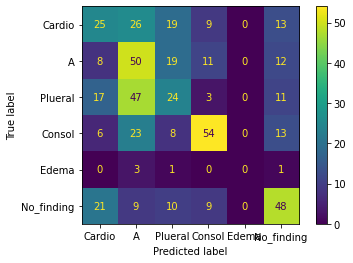

In [ ]:


my_predictions = my_model.predict(testing_images)
print(my_predictions.shape)


cmd = ConfusionMatrixDisplay((confusion_matrix(list(np.argmax(testing_labels, axis=1)), list(np.argmax(my_predictions, axis=1)))), display_labels=['Cardio', 'A','Plueral','Consol','Edema','No_finding'])
cmd.plot()
plt.show()


In [ ]:
a = my_model.evaluate(testing_images, testing_labels) 
print('Validation accuracy:', a[1]) 

16/16 [==============================] - 1s 40ms/step - loss: 1.5014 - categorical_accuracy: 0.4020
Validation accuracy: 0.4020000100135803
